In [1]:
##importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('adult.csv')  ## reading the datset to python environment

In [3]:
data

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [6]:
data.nunique()      ## unique value count in columns

age                   74
workclass              9
fnlwgt             28523
education             16
educational-num       16
marital-status         7
occupation            15
relationship           6
race                   5
gender                 2
capital-gain         123
capital-loss          99
hours-per-week        96
native-country        42
income                 2
dtype: int64

In [7]:
data.isin(['?']).sum(axis=0)     ## finding special characters

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [8]:
## Replacing special characters with nan
data['native-country'] = data['native-country'].replace('?',np.nan)
data['workclass'] = data['workclass'].replace('?',np.nan)
data['occupation'] = data['occupation'].replace('?',np.nan)

In [9]:
data.isin(['?']).sum(axis=0) 

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

special character is removed from the data

In [10]:
data.isna().sum()   ##checking for missing(null) values

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [11]:
print(f"We have {data.duplicated().sum()} duplicate values")   ## checking for duplicate entries

We have 52 duplicate values


In [12]:
data= data.drop_duplicates()   ## duplicate values are dropped

In [13]:
data.describe()   ## statistical summary

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48790.000000,4.879000e+04,48790.000000,48790.000000,48790.000000,48790.000000
mean,38.652798,1.896690e+05,10.078807,1080.217688,87.595573,40.425886
std,13.708493,1.056172e+05,2.570046,7455.905921,403.209129,12.392729
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175550e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781385e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376062e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [14]:
data.describe(include='O')          ## summary of catagorical columns

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45995,48790,48790,45985,48790,48790,48790,47934,48790
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,33860,15770,22366,6165,19703,41714,32614,43792,37109


<function matplotlib.pyplot.show(close=None, block=None)>

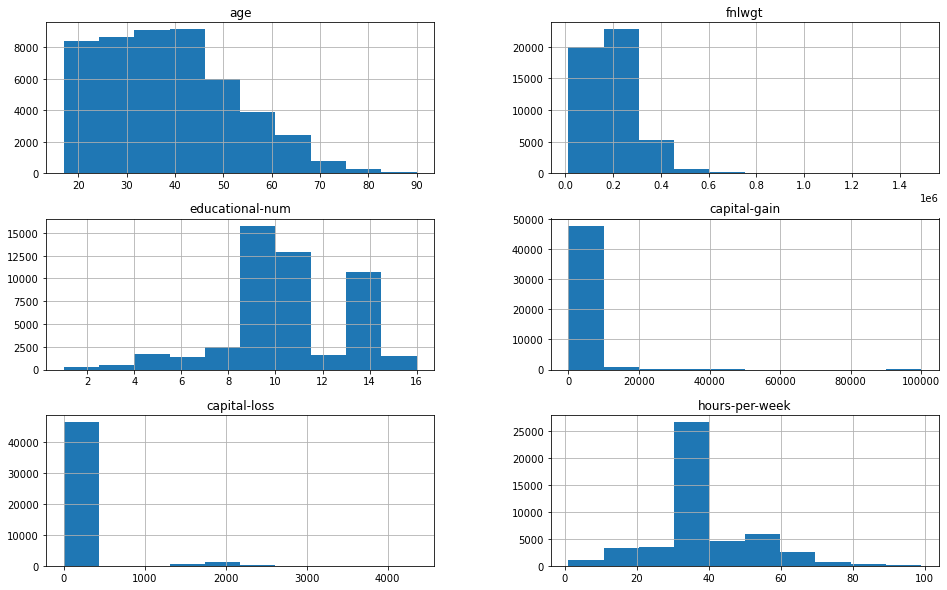

In [15]:
data.hist(figsize=(16,10))
plt.show

most of the people are from age  17 to 50

<AxesSubplot:>

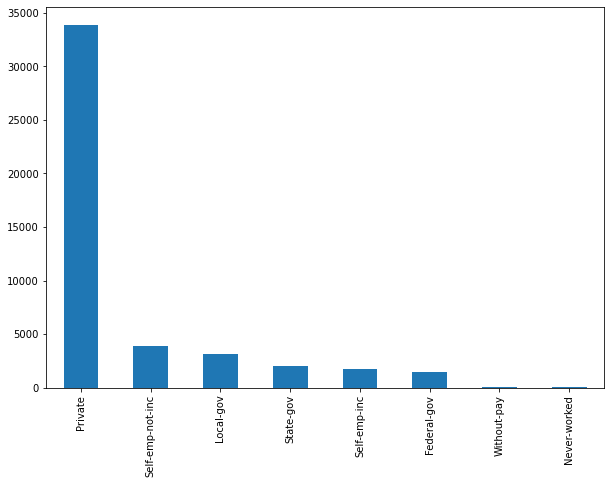

In [16]:
plt.figure(figsize=(10,7))
data['workclass'].value_counts().plot(kind='bar')

employees from private sector is considered for the study

In [17]:
data['income'].value_counts()           

<=50K    37109
>50K     11681
Name: income, dtype: int64

<AxesSubplot:>

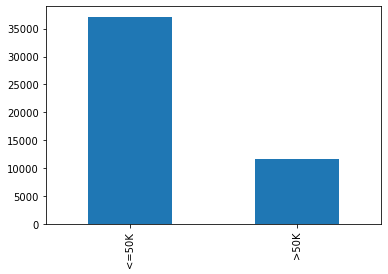

In [18]:
data['income'].value_counts().plot(kind='bar')

people with income greater than or equal to  50k is more

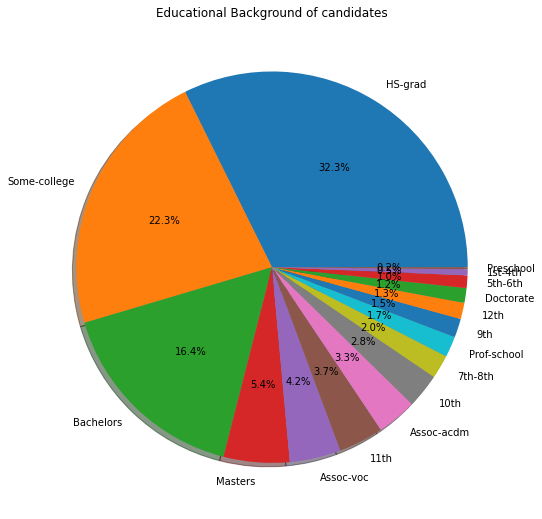

In [19]:
labels=list(dict(data['education'].value_counts()))
d1=list(data['education'].value_counts())
plt.figure(figsize=(16,9))
plt.pie(d1,labels = labels,shadow=True,autopct='%1.1f%%')
plt.title('Educational Background of candidates')
plt.show()

about 32% of the people are having HS grad

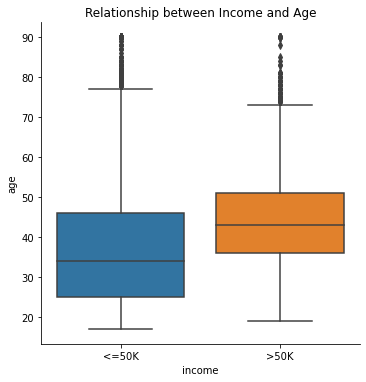

In [20]:
sns.catplot(data=data, x='income', y='age', kind= 'box')
plt.title('Relationship between Income and Age')
plt.show()

In [21]:
#Age of people with income less than 50K is between 25 and 45
#Age of people with income more than 50K is between 35 and 50
#Salary increment is happening with age

Self-emp-inc workclass is getting the highest income.

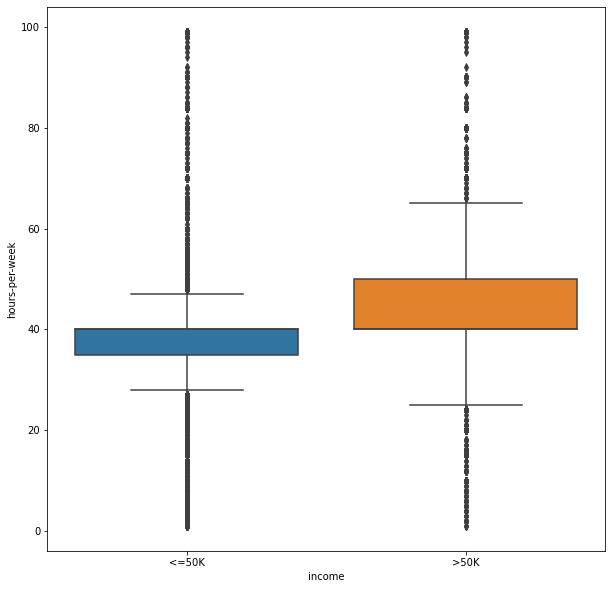

In [22]:
fig = plt.figure(figsize=(10,10)) 
sns.boxplot(x="income", y="hours-per-week", data=data)
plt.show()

As working hours per week increases income also increases

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
data.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [25]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.303919
Female    0.109360
Name: income, dtype: float64

Males are getting more income than female

In [26]:
data.groupby('workclass')['income'].mean().sort_values(ascending= False)

workclass
Self-emp-inc        0.553719
Federal-gov         0.391760
Local-gov           0.295599
Self-emp-not-inc    0.278943
State-gov           0.267542
Private             0.217986
Without-pay         0.095238
Never-worked        0.000000
Name: income, dtype: float64